# Introduction

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#useful tools
from sklearn.model_selection import cross_validate
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


### Notebook display settings

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

import warnings
warnings.filterwarnings("ignore")

### Default figure settings

In [3]:
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.labelweight']='normal'
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"

### Get the number of cpu

In [4]:
import multiprocessing as mp
n_cpu=mp.cpu_count() - 2 

# Data Transformation & Exploration

### Read the data

In [5]:
training_data=pd.read_csv('Data/epl-training.csv')
data = training_data # Michael: delete it when naming is resolved
df = training_data.copy() # Michael: delete it when naming is resolved. df is Mike's df so original object is untouched

# Dropping the trailing columns
training_data.dropna(axis=1, how='all',inplace=True)
training_data.drop([column for column in training_data.columns if 'Unnamed' in column], axis = 1, inplace=True) 
#print('shape: ', training_data.shape)

#check about the datatypes, some attributes are needed to be encoded for the subsequent processes.
training_data.dtypes

training_data.shape

(4180, 22)

In [6]:
training_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2008,Arsenal,West Brom,1,0,H,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0
1,16/08/2008,Bolton,Stoke,3,1,H,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0
2,16/08/2008,Everton,Blackburn,2,3,A,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0
3,16/08/2008,Hull,Fulham,2,1,H,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0
4,16/08/2008,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0


### Exploratory Data Analysis

In [7]:
def get_pivot_column_vs_column_count(df,col1,col2):
    return df.groupby([col1,col2]).size().reset_index().\
              rename(columns={0:'counts'}).\
              pivot(values='counts',index=col1,columns=col2)

In [8]:
def get_column_countplot(df,col,y='FTR',ax=None ):
    if ax is None:
        ax = plt.gca()
    df.groupby([col, y]).size().reset_index().\
       pivot(columns=y, index=col, values=0).\
       plot(kind='bar', stacked=True,ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Counts')
    ax.set_title('Count Plot: %s'%(col))

#### Number of matches

In [9]:
get_pivot_column_vs_column_count(training_data,'HomeTeam','AwayTeam')

AwayTeam,Arsenal,Aston Villa,Birmingham,Blackburn,Blackpool,Bolton,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Hull,Leicester,Liverpool,Man City,Man United,Middlesbrough,Newcastle,Norwich,Portsmouth,QPR,Reading,Southampton,Stoke,Sunderland,Swansea,Tottenham,Watford,West Brom,West Ham,Wigan,Wolves
HomeTeam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arsenal,NaN,8.0,2.0,4.0,1.0,4.0,4.0,2.0,5.0,2.0,11.0,6.0,11.0,7.0,2.0,5.0,5.0,11.0,11.0,11.0,2.0,9.0,4.0,2.0,3.0,1.0,7.0,10.0,9.0,7.0,11.0,4.0,9.0,10.0,5.0,4.0
Aston Villa,8.0,NaN,2.0,4.0,1.0,4.0,1.0,NaN,2.0,1.0,8.0,3.0,8.0,6.0,NaN,4.0,2.0,8.0,8.0,8.0,1.0,7.0,4.0,2.0,3.0,1.0,4.0,8.0,8.0,5.0,8.0,1.0,7.0,7.0,5.0,3.0
Birmingham,2.0,2.0,NaN,2.0,1.0,2.0,NaN,NaN,1.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,2.0
Blackburn,4.0,4.0,2.0,NaN,1.0,4.0,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Blackpool,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0
Bolton,4.0,4.0,2.0,4.0,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Bournemouth,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,4.0,4.0,4.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,NaN,NaN,NaN,4.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,NaN,1.0
Brighton,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,NaN,1.0
Burnley,5.0,2.0,1.0,1.0,NaN,1.0,3.0,2.0,NaN,1.0,5.0,4.0,5.0,2.0,2.0,3.0,4.0,5.0,5.0,5.0,1.0,3.0,NaN,1.0,1.0,NaN,4.0,4.0,3.0,3.0,5.0,3.0,3.0,5.0,1.0,2.0


### HTR vs. FTR

In [10]:
get_pivot_column_vs_column_count(training_data,'HTR','FTR')

FTR,A,D,H
HTR,,,
A,703,199,99
D,439,647,646
H,70,191,1186


In [11]:
cat_col_list=[x for x in training_data.columns\
              if x not in ['Date','HomeTeam','AwayTeam','Referee','FTR','HTR']]


In [12]:
cat_col_list = np.reshape(cat_col_list, (8, 2))

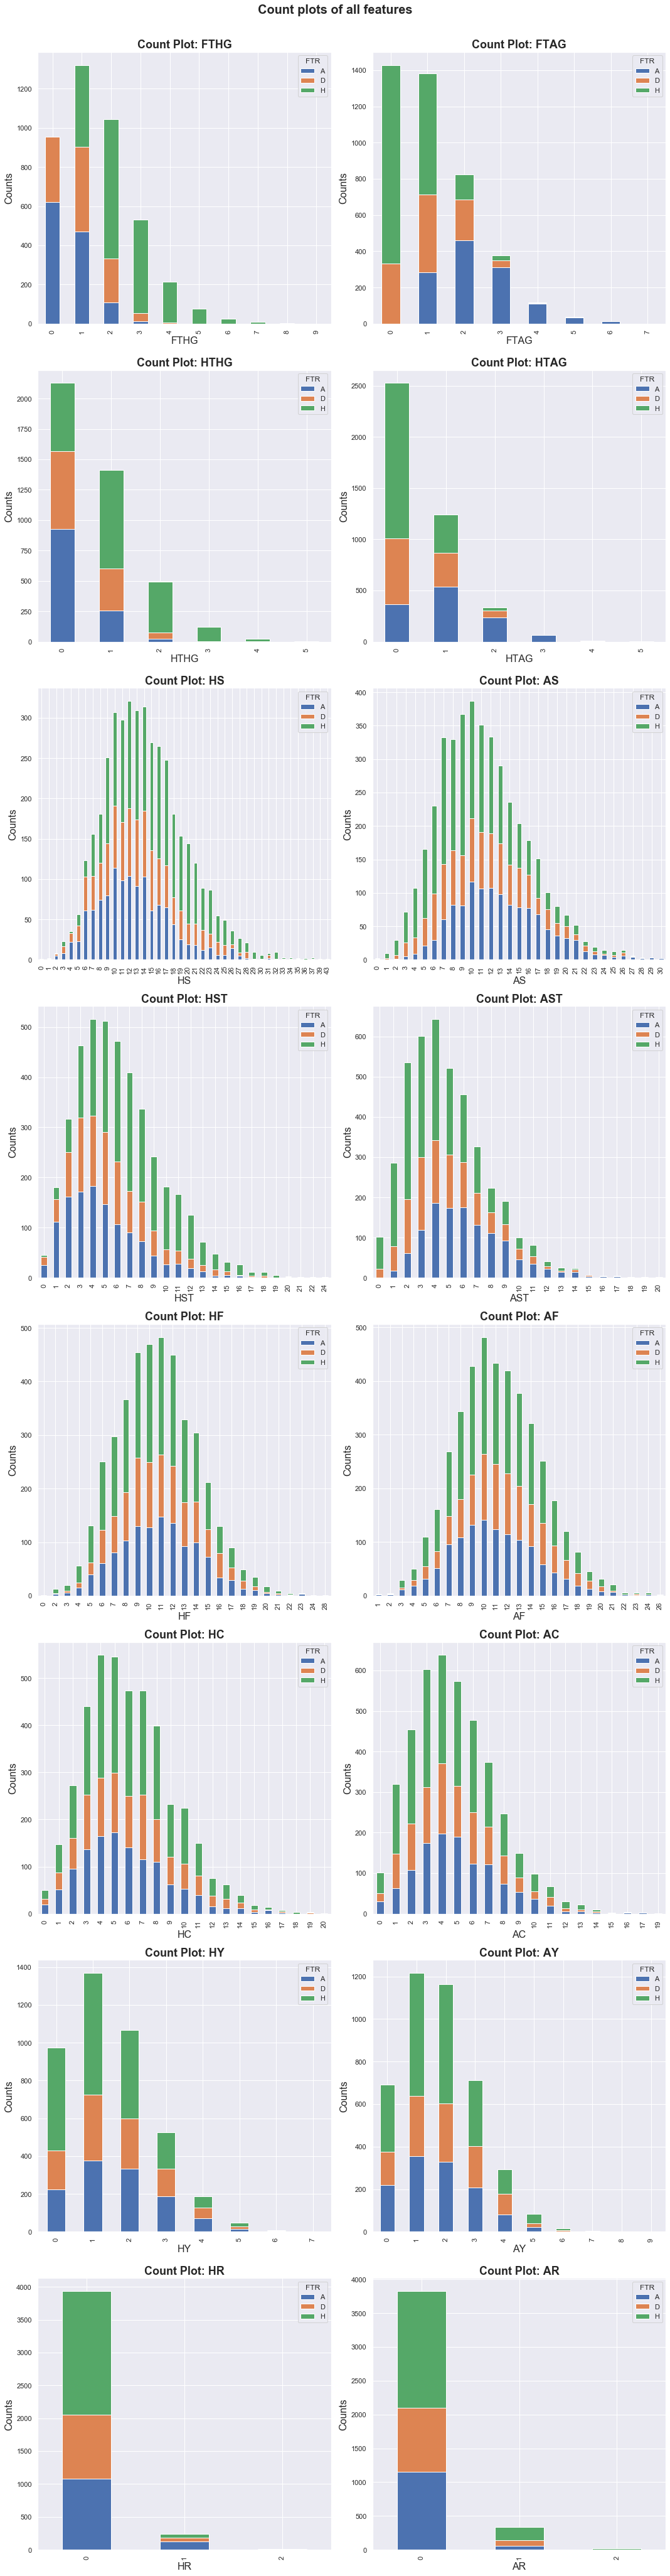

In [13]:
fig, axes = plt.subplots(8,2,figsize=(15,60))
for i in range(8):
    for j in range(2):
        get_column_countplot(training_data,cat_col_list[i][j], ax=axes[i,j])
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle("Count plots of all features",fontweight='bold',fontsize=20)
plt.show()

### Checking the dataset is balanced

In [14]:
count_val=training_data['FTR'].value_counts()

In [15]:
count_val

H    1931
A    1212
D    1037
Name: FTR, dtype: int64

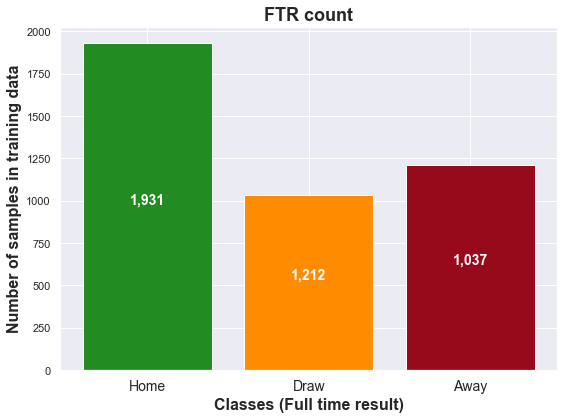

In [16]:
count_val=training_data['FTR'].value_counts()

#Visualising the count
X_ticks=['Home','Draw','Away']
bar_width=0.7
fig,ax=plt.subplots()
plt.bar(1,count_val[0],color='forestgreen')
plt.bar(2,count_val[2],color='darkorange')
plt.bar(3,count_val[1],color='#970a1b')
plt.text(1, count_val[0]/2, "{:,}".format(count_val[0]),color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(2, count_val[2]/2, "{:,}".format(count_val[1]), color='w'
         ,ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(3, count_val[1]/2, "{:,}".format(count_val[2]), color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
ax.set_title('FTR count',fontsize=18,fontweight='bold')
ax.set_xlabel('Classes (Full time result)',fontsize=16,fontweight='bold')
ax.set_ylabel('Number of samples in training data',fontsize=16,
              fontweight='bold')
ax.set_xticks([1,2,3])
ax.set_xticklabels(X_ticks,fontsize=14)
fig.tight_layout()
plt.show()

### Calculate the correlation between the features

In [17]:
correlation = data.corr()
corr_array  = np.array(correlation)

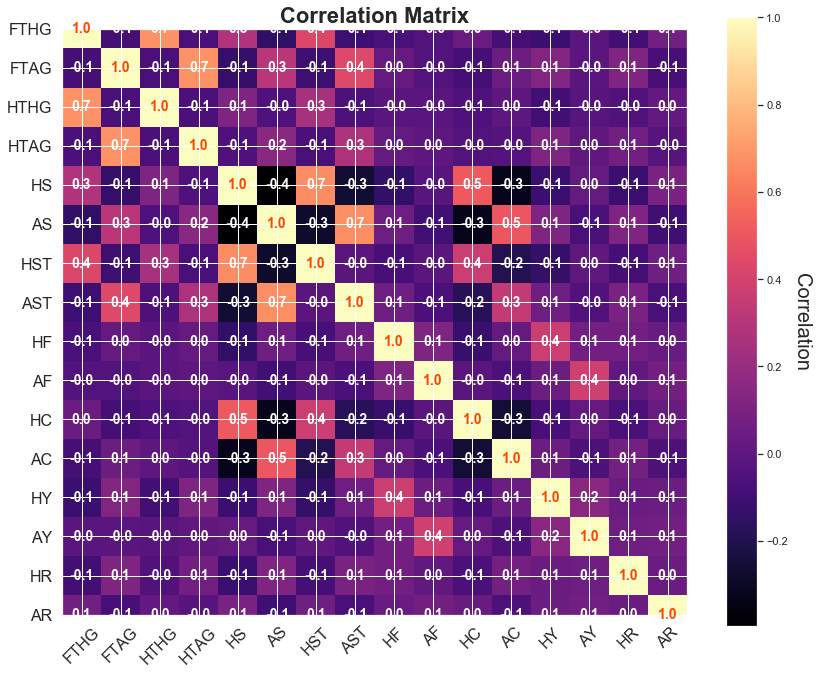

In [18]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(corr_array,cmap='magma')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom",fontsize=20)
data = im.get_array()
textcolors=['#FFFFFF','#FF4500']
for i in range(correlation.shape[0]):
        for j in range(correlation.shape[1]):
            text = im.axes.text(j, i, '%1.1f'%data[i, j], 
                                color=textcolors[data[i, j]>0.85],
                                ha='center',va='center',fontsize=14,fontweight='bold')
ax.set_title('Correlation Matrix',fontsize=22,fontweight='bold')
ax.set_xticks(np.arange(len(correlation.columns.tolist())))
ax.set_yticks(np.arange(len(correlation.columns)))
ax.set_xticklabels(correlation.columns,fontsize=16,rotation=45)
ax.set_yticklabels(correlation.columns,fontsize=16)
plt.show()

### MichaelMod_1

### Check if there are duplicate or null value data.

In [19]:
df = training_data # delete this ref when ref naming is resolved
print("Number of duplicate rows: ", df[df.duplicated()].shape[0])
print("Number of null blocks by colums:\n", df.isnull().sum(), sep='') #TODO: consider to plot it instead

Number of duplicate rows:  0
Number of null blocks by colums:
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64


### A Brief Overview of Data

In [20]:
print(df.describe())

              FTHG         FTAG         HTHG         HTAG           HS  \
count  4180.000000  4180.000000  4180.000000  4180.000000  4180.000000   
mean      1.555024     1.170813     0.684450     0.514354    14.133493   
std       1.313536     1.158635     0.835728     0.729533     5.487821   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000    10.000000   
50%       1.000000     1.000000     0.000000     0.000000    14.000000   
75%       2.000000     2.000000     1.000000     1.000000    17.000000   
max       9.000000     7.000000     5.000000     5.000000    43.000000   

                AS          HST          AST           HF           AF  \
count  4180.000000  4180.000000  4180.000000  4180.000000  4180.000000   
mean     11.182057     6.147608     4.847129    10.682057    11.204306   
std       4.665311     3.486477     2.913169     3.424517     3.615245   
min       0.000000     0.000000     0

### Mean and Percentiles of Data

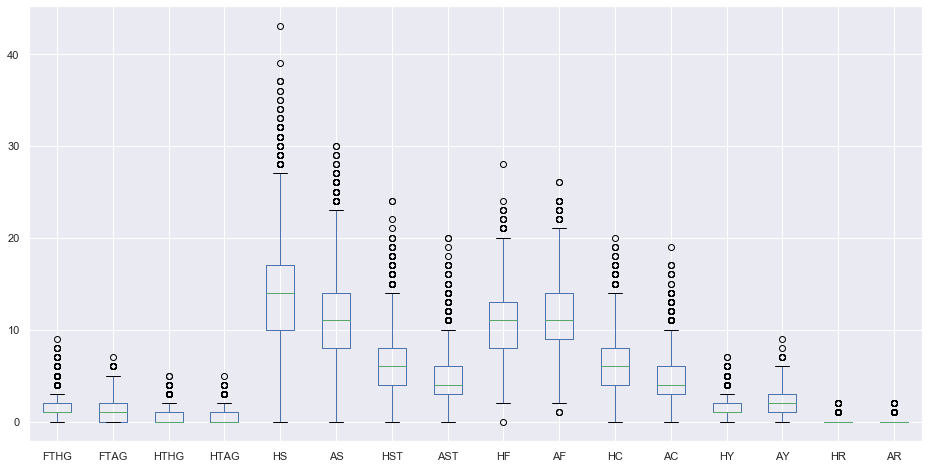

In [21]:
df.boxplot(figsize=(16,8));

### Trim Out of Percentile Data to Reduce Bias

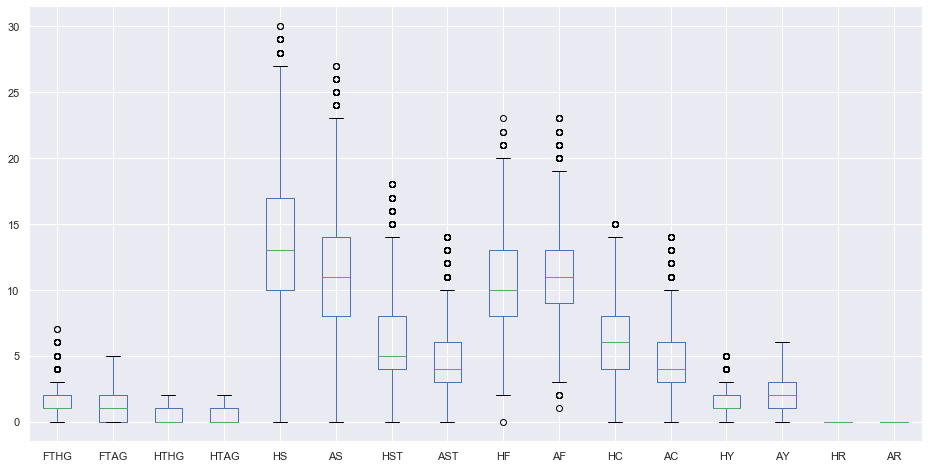

In [22]:
# Func has no side effect: doesn't change input df.
def trim_df_data(df, q1 = 0.25, q2 = 0.75):
    Q1 = df.quantile(q1); Q3 = df.quantile(q2);
    IQR = Q3 - Q1
    df_trimmed = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_trimmed

df = training_data # ref df to t.a.. Del it when muliple refs issue is resolved.

q1 = 0.2
q2 = 0.8
df_trimmed = trim_df_data(df, q1, q2)
df_trimmed.boxplot(figsize=(16,8));

### Loss of Valuable Data in Trimming

In [23]:
rows_org = int(df.shape[0])
rows_trimmed = int(df_trimmed.shape[0])

print('Loss of data:', rows_org - rows_trimmed,
      '\nOld Data Numbers:', rows_org,
      '\nNew Data Numbers:', rows_trimmed
     )

Loss of data: 855 
Old Data Numbers: 4180 
New Data Numbers: 3325


### thus, we stick with original data to presever size but consider trimming later

### Unbalanced Matches by Home Teams

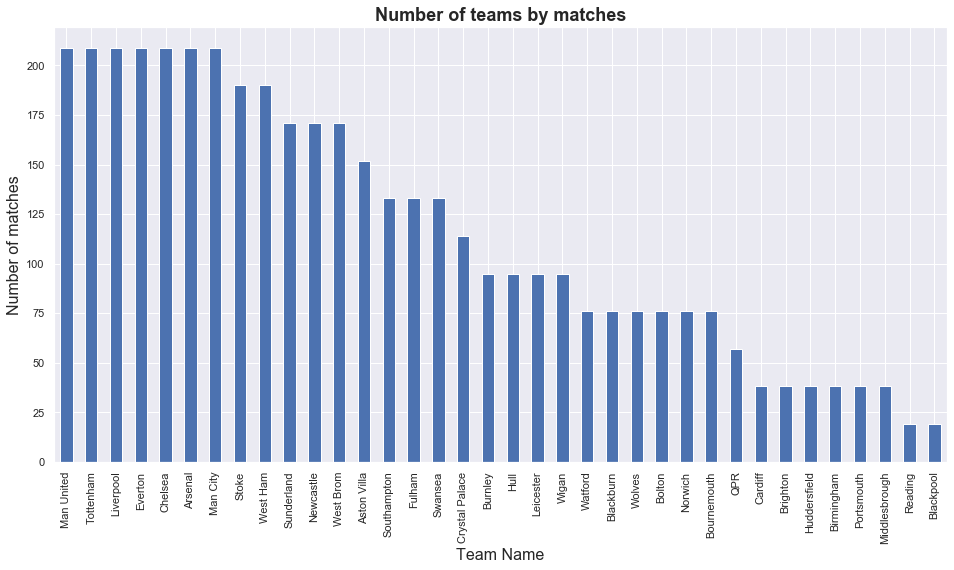

In [24]:
df.HomeTeam.value_counts().plot(kind='bar', figsize=(16,8))

plt.title('Number of teams by matches')
plt.ylabel('Number of matches')
plt.xlabel('Team Name');
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

### thus, we can see that some teams have over 200 match data, but some have less than 25 match data.

### Apply Transformation for Results ( part of Feat. Eng.)

In [25]:
def encodeHDA(e):
    if(e == 'H'):
        return 1
    elif(e == 'A'):
        return -1
    elif(e == 'D'):
        return 0
    else:
        return e

#map the FTR and HTR to {-1,0,1} unbias classes
df['FTR'] = df['FTR'].map(lambda x: encodeHDA(x))
df['HTR'] = df['HTR'].map(lambda x: encodeHDA(x))

# The FTR and HTR in the middle changes to {-1,0,1} now
df.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4175,12/05/2019,Liverpool,Wolves,2,0,1,1,0,1,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0
4176,12/05/2019,Man United,Cardiff,0,2,-1,0,1,-1,J Moss,26,13,10,4,9,6,11,2,3,3,0,0
4177,12/05/2019,Southampton,Huddersfield,1,1,0,1,0,1,L Probert,10,10,3,3,8,6,4,3,0,1,0,0
4178,12/05/2019,Tottenham,Everton,2,2,0,1,0,1,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0
4179,12/05/2019,Watford,West Ham,1,4,-1,0,2,-1,C Kavanagh,17,16,8,9,10,10,7,2,1,0,1,0


### End MichaelMod_1

# Feature Engineering

In [26]:
X=training_data[[column for column in training_data.columns if column != 'FTR']]
Y=training_data['FTR']

print(X.shape) #The overall shape of the training data
total_matches = X.shape[0] #Get total number of matches
average_home_goals = X.FTHG.sum()/ total_matches #Sum home goals column, divide by total matches
average_away_goals = X.FTAG.sum() / total_matches #Sum away goals column, divide by total matches
print(average_home_goals)
print(average_away_goals)
avg_home_conceded = average_away_goals #Average conceded goals = Average of goals for opposite team
avg_away_conceded = avg_home_conceded
#Note that this is the average across ALL teams

X.head()

(4180, 21)
1.555023923444976
1.1708133971291865


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2008,Arsenal,West Brom,1,0,1,0,1,H Webb,24,5,14,4,11,8,7,5,0,0,0,0
1,16/08/2008,Bolton,Stoke,3,1,3,0,1,C Foy,14,8,8,2,13,12,4,3,1,2,0,0
2,16/08/2008,Everton,Blackburn,2,3,1,1,0,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0
3,16/08/2008,Hull,Fulham,2,1,1,1,0,P Walton,11,12,6,6,10,9,5,6,3,0,0,0
4,16/08/2008,Middlesbrough,Tottenham,2,1,0,0,0,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0


In [27]:
#We obtain a table just for the teams. Each team has attributes Home 
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))
res_home = X.groupby('HomeTeam')
res_away = X.groupby('AwayTeam')
all_teams_list = list(res_home.groups.keys())

print(all_teams_list)
table.Team = list(all_teams_list)
table.HGS = res_home.FTHG.sum().values #Home goal score
table.HGC = res_home.FTAG.sum().values #Home goal conceded
table.AGS = res_away.FTAG.sum().values #Away goal score
table.AGC = res_away.FTHG.sum().values #Away goal conceded

total_home_games_played = res_home.FTHG.count()
total_away_games_played = res_away.FTAG.count()

#Home Attacking Strength
table.HAS = (np.divide(table.HGS,total_home_games_played.values)) / average_home_goals
#Away Attacking Strength
table.AAS = (np.divide(table.AGS,total_away_games_played.values)) / average_away_goals
#Home Defence Strength
table.HDS = (np.divide(table.HGC,total_home_games_played.values)) / avg_home_conceded
#Away Defence Strength
table.ADS = (np.divide(table.AGC,total_away_games_played.values)) / avg_away_conceded

table.head()

['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', 'Bolton', 'Bournemouth', 'Brighton', 'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield', 'Hull', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', 'Portsmouth', 'QPR', 'Reading', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wigan', 'Wolves']


,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,441,356,1.356923,1.454843,174,292,0.711075,1.193298
1,Aston Villa,179,156,0.757308,0.876584,198,264,1.112587,1.483449
2,Birmingham,38,37,0.643077,0.831631,35,70,0.786678,1.573355
3,Blackburn,98,77,0.829231,0.865345,90,162,1.011443,1.820597
4,Blackpool,30,25,1.015385,1.123825,37,41,1.663261,1.843073


In [28]:
#Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in X.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

X['HAS'] = f_HAS
X['HDS'] = f_HDS
X['AAS'] = f_AAS
X['ADS'] = f_ADS

X

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HAS,HDS,AAS,ADS
0,16/08/2008,Arsenal,West Brom,1,0,1,0,1,H Webb,24,5,14,4,11,8,7,5,0,0,0,0,1.356923,0.711075,0.769196,1.358580
1,16/08/2008,Bolton,Stoke,3,1,3,0,1,C Foy,14,8,8,2,13,12,4,3,1,2,0,0,0.880000,1.292399,0.674295,1.402534
2,16/08/2008,Everton,Blackburn,2,3,1,1,0,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0,1.101538,0.919493,0.865345,1.820597
3,16/08/2008,Hull,Fulham,2,1,1,1,0,P Walton,11,12,6,6,10,9,5,6,3,0,0,0,0.724308,1.303637,0.667873,1.387121
4,16/08/2008,Middlesbrough,Tottenham,2,1,0,0,0,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0,0.575385,0.966490,1.356763,1.144258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,12/05/2019,Liverpool,Wolves,2,0,1,0,1,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0,1.350769,0.702902,0.842869,1.505926
4176,12/05/2019,Man United,Cardiff,0,2,0,1,-1,J Moss,26,13,10,4,9,6,11,2,3,3,0,0,1.338462,0.678382,0.561913,1.573355
4177,12/05/2019,Southampton,Huddersfield,1,1,1,0,1,L Probert,10,10,3,3,8,6,4,3,0,1,0,0,0.957363,1.021075,0.539436,1.753167
4178,12/05/2019,Tottenham,Everton,2,2,1,0,1,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0,1.156923,0.731508,0.984879,1.136085


In [29]:
#Some additional features: 
# - Average goals of home team in the past n matches against the away team
# - Average goals of away team in past n matches against home team
# - Average points of away team in the past n matches against the home team

n_matches = len(X)
average_home_points = (3*sum(Y == 'H') + sum(Y == 'D'))/n_matches
average_away_points = (3*sum(Y == 'A') + sum(Y == 'D'))/n_matches
print(average_home_goals)
print(average_away_goals)
print(average_home_points)
print(average_away_points)

1.555023923444976
1.1708133971291865
0.0
0.0


In [30]:
def get_features_match(match, n=5):
    team1 = match['HomeTeam']
    team2 = match['AwayTeam']
    # Constructing a table when all the matches between the two teams are shown.
    res = X[((X['HomeTeam']==team1) & (X['AwayTeam']==team2)) | ((X['AwayTeam']==team1) & (X['HomeTeam']==team2))]
    name = match.name
    idx = res.index.get_loc(name)
    if idx >= n: #If there is at least n matches between the teams
        matches = res.iloc[idx-n:idx]
        pts_home = 0
        goals_home = 0
        goals_away = 0
        for index, row in matches.iterrows():
            #This ifs control if the current home team was home team or away in the past matches between the team in order
            #to sum correctly home/away goals. 
            if row['HomeTeam'] == team1:
                goals_home += row['FTHG']
                goals_away += row['FTAG']
                if Y[index] == 'H':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
            if row['AwayTeam'] == team1:
                goals_home += row['FTAG'] 
                goals_away += row['FTHG']
                if Y[index] == 'A':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
        pts_avg = pts_home/n
        goals_home_avg = goals_home/n
        goals_away_avg = goals_away/n
    elif idx == 0: # If there is 0 matches between the teams
        pts_avg = 1.6450138504155125
        goals_home_avg = 1.5336565096952908
        goals_away_avg = 1.1425207756232687
    else: #Some games between the teams but not n
        matches = res.iloc[0:idx]
        m = len(matches)
        pts_home = 0
        goals_home = 0
        goals_away = 0
        for index, row in matches.iterrows():
            #This ifs control if the current home team was home team or away in the past matches between the team in order
            #to sum correctly home/away goals. 
            if row['HomeTeam'] == team1:
                goals_home += row['FTHG']
                goals_away += row['FTAG']
                if Y[index] == 'H':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
            if row['AwayTeam'] == team1:
                goals_home += row['FTAG'] 
                goals_away += row['FTHG']
                if Y[index] == 'A':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
        pts_avg = pts_home/m
        goals_home_avg = goals_home/m
        goals_away_avg = goals_away/m
    return pts_avg, goals_home_avg, goals_away_avg

In [31]:
pts_avgs = []
goals_home_avgs = []
goals_away_avgs = []
for index, row in X.iterrows():
    pts_avg, goals_home_avg, goals_away_avg = get_features_match(row, n=5)
    pts_avgs.append(pts_avg)
    goals_home_avgs.append(goals_home_avg)
    goals_away_avgs.append(goals_away_avg)


feature_table = X # reference ft to X FOR TMP SIMPLE USE ONLY. REMEMBER TO DELETE LATER !!!

In [32]:
feature_table['FFPTSH'] = pts_avgs
feature_table['FFHG'] = goals_home_avgs
feature_table['FFAG'] = goals_away_avgs 

In [33]:
feature_table.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HAS,HDS,AAS,ADS,FFPTSH,FFHG,FFAG
0,16/08/2008,Arsenal,West Brom,1,0,1,0,1,H Webb,24,5,14,4,11,8,7,5,0,0,0,0,1.356923,0.711075,0.769196,1.358580,1.645014,1.533657,1.142521
1,16/08/2008,Bolton,Stoke,3,1,3,0,1,C Foy,14,8,8,2,13,12,4,3,1,2,0,0,0.880000,1.292399,0.674295,1.402534,1.645014,1.533657,1.142521
2,16/08/2008,Everton,Blackburn,2,3,1,1,0,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0,1.101538,0.919493,0.865345,1.820597,1.645014,1.533657,1.142521
3,16/08/2008,Hull,Fulham,2,1,1,1,0,P Walton,11,12,6,6,10,9,5,6,3,0,0,0,0.724308,1.303637,0.667873,1.387121,1.645014,1.533657,1.142521
4,16/08/2008,Middlesbrough,Tottenham,2,1,0,0,0,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0,0.575385,0.966490,1.356763,1.144258,1.645014,1.533657,1.142521


In [34]:
#Extract features relating to form. Form is defined as a team's recent performance, e.g. recently 
#winning many matches.


#We can also look at whether a team is also "streaking" i.e. winning matches consecutively.

def get_features_streak_home(match, n=10):
    team1 = match['HomeTeam']
    team1_stats = X[((X['HomeTeam']==team1) | (X['AwayTeam']==team1))]
    name = match.name
    idx = team1_stats.index.get_loc(name)
    if idx == 0:
        pts_avg = 1.6450138504155125
        goals_scored_avg = 1.5336565096952908
        goals_conceded_avg = 1.1425207756232687
    else:
        if idx-n < 0:
            newidx = 0
        else:
            newidx = idx - n
        matches_team1 = team1_stats.iloc[newidx:idx]
        m = len(matches_team1)
        pts = 0
        goals_scored = 0
        goals_conceded = 0
        for index, row in matches_team1.iterrows():
            if row['HomeTeam'] == team1:
                goals_scored += row['FTHG']
                goals_conceded += row['FTAG']
                if Y[index] == 'H':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
            if row['AwayTeam'] == team1:
                goals_scored += row['FTAG'] 
                goals_conceded += row['FTHG']
                if Y[index] == 'A':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
        pts_avg = pts/m
        goals_scored_avg = goals_scored/m
        goals_conceded_avg = goals_conceded/m
    return pts_avg, goals_scored_avg, goals_conceded_avg

#Seeing if it works for a given match
match = X.iloc[1234,:]
get_features_streak_home(match, n=10)


pts_streak_home = []
goals_scored_streak_home = []
goals_conceded_streak_home = []
for index, row in X.iterrows():
    pt_streak_home, goal_scored_streak_home, goal_conceded_streak_home = get_features_streak_home(row, n=15)
    pts_streak_home.append(pt_streak_home)
    goals_scored_streak_home.append(goal_scored_streak_home)
    goals_conceded_streak_home.append(goal_conceded_streak_home)
print(len(pts_streak_home))

feature_table['PSH'] = pts_streak_home
feature_table['SSH'] = goals_home_avgs
feature_table['CSH'] = goals_away_avgs 
feature_table.tail()

feature_table.head()

def get_features_streak_away(match, n=10):
    team1 = match['AwayTeam']
    team1_stats = X[((X['HomeTeam']==team1) | (X['AwayTeam']==team1))]
    name = match.name
    idx = team1_stats.index.get_loc(name)
    if idx == 0:
        pts_avg = 1.1023545706371192
        goals_scored_avg = 1.1425207756232687
        goals_conceded_avg = 1.5336565096952908
    else:
        if idx-n < 0:
            newidx = 0
        else:
            newidx = idx - n
        matches_team1 = team1_stats.iloc[newidx:idx]
        m = len(matches_team1)
        pts = 0
        goals_scored = 0
        goals_conceded = 0
        for index, row in matches_team1.iterrows():
            if row['HomeTeam'] == team1:
                goals_scored += row['FTHG']
                goals_conceded += row['FTAG']
                if Y[index] == 'H':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
            if row['AwayTeam'] == team1:
                goals_scored += row['FTAG'] 
                goals_conceded += row['FTHG']
                if Y[index] == 'A':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
        pts_avg = pts/m
        goals_scored_avg = goals_scored/m
        goals_conceded_avg = goals_conceded/m
    return pts_avg, goals_scored_avg, goals_conceded_avg



pts_streak_away = []
goals_scored_streak_away = []
goals_conceded_streak_away = []
for index, row in X.iterrows():
    pt_streak_away, goal_scored_streak_away, goal_conceded_streak_away = get_features_streak_away(row, n=15)
    pts_streak_away.append(pt_streak_away)
    goals_scored_streak_away.append(goal_scored_streak_away)
    goals_conceded_streak_away.append(goal_conceded_streak_away)
len(pts_streak_home)



feature_table['PSA'] = pts_streak_away
feature_table['SSA'] = goals_scored_streak_away
feature_table['CSA'] = goals_conceded_streak_away


4180


In [35]:
feature_table.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HAS,HDS,AAS,ADS,FFPTSH,FFHG,FFAG,PSH,SSH,CSH,PSA,SSA,CSA
0,16/08/2008,Arsenal,West Brom,1,0,1,0,1,H Webb,24,5,14,4,11,8,7,5,0,0,0,0,1.356923,0.711075,0.769196,1.358580,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657
1,16/08/2008,Bolton,Stoke,3,1,3,0,1,C Foy,14,8,8,2,13,12,4,3,1,2,0,0,0.880000,1.292399,0.674295,1.402534,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657
2,16/08/2008,Everton,Blackburn,2,3,1,1,0,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0,1.101538,0.919493,0.865345,1.820597,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657
3,16/08/2008,Hull,Fulham,2,1,1,1,0,P Walton,11,12,6,6,10,9,5,6,3,0,0,0,0.724308,1.303637,0.667873,1.387121,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657
4,16/08/2008,Middlesbrough,Tottenham,2,1,0,0,0,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0,0.575385,0.966490,1.356763,1.144258,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657


### MichaelMod_2

### Re-setup My Testing df Enviroment

In [36]:
# re-construct df to ref to engineered features.
df = X.copy() # I don't want to ruin X and Y for the testing
df['FTR'] = Y

# df['FTR'] = df['FTR'].map(lambda x: encodeHDA(x))
# df['HTR'] = df['HTR'].map(lambda x: encodeHDA(x))

df_num_raw = df.select_dtypes(include = ['int64']) # it selects old raw features only !
df_num_eng = df.select_dtypes(include = ['float64'])# it selects new features only !

## Comparing Raw and Engineered Data Distribution

### Raw Features Distribution

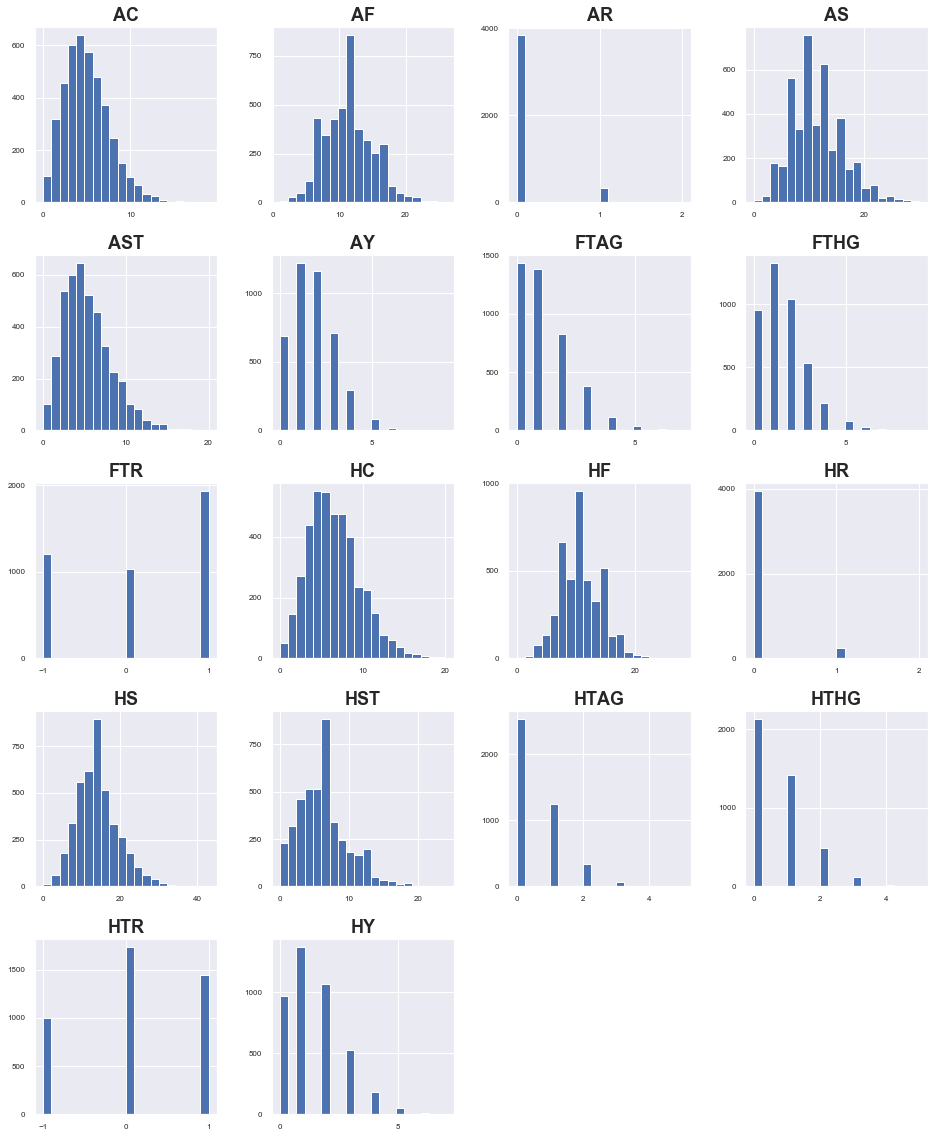

In [37]:
df_num_raw.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

### Engineered Features Distribution

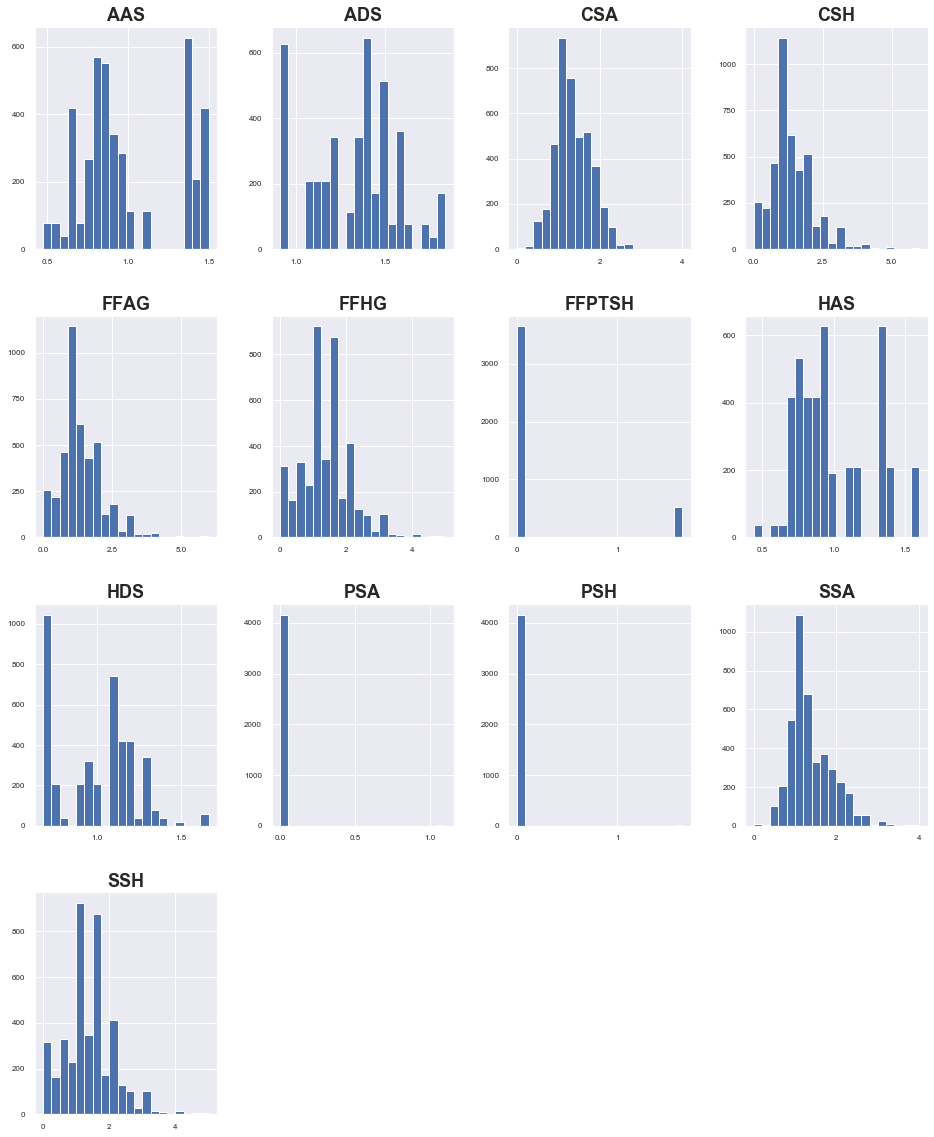

In [38]:
df_num_eng.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);
#Mike: FFPTSH, PSA and PSH are a bit weired

### Find Out the Exact Correlated Features over Threshold

In [39]:
# find correlated vals to feat, such as 'FTR'
def printMostCorFeat(df, toFeat, thresh = 0.5):
    df_corr = df.corr()[toFeat]
    
    featList = df_corr.drop(labels = [toFeat])[abs(df_corr) > thresh].sort_values(ascending=False)
    print("{} strongly correlated values\nThey are:\n{}".format(len(featList), featList))
    return None

df_num_eng['FTR'] = Y # adding FTR to eng feat. for comparison
printMostCorFeat(df_num_raw, 'FTR', 0.4)
print('\n')
printMostCorFeat(df_num_eng, 'FTR', 0.2)


5 strongly correlated values
They are:
FTHG    0.621950
HTR     0.610400
HTHG    0.433493
HTAG   -0.443319
FTAG   -0.640924
Name: FTR, dtype: float64


5 strongly correlated values
They are:
HAS    0.303059
ADS    0.277855
SSA   -0.236786
AAS   -0.289105
HDS   -0.291527
Name: FTR, dtype: float64


## Comparison of Correlation Heatmap

### Correalation Heatmap for Raw Features

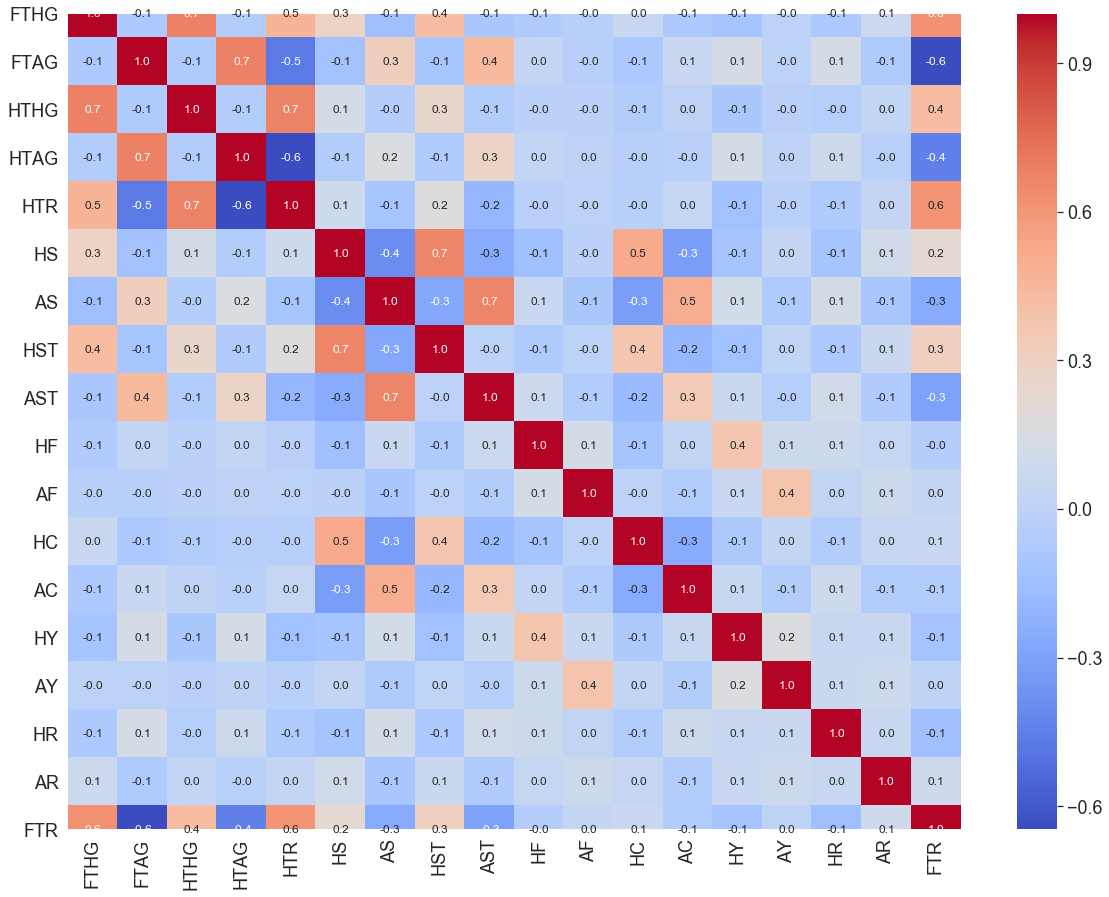

In [40]:
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(df_num_raw.corr(), annot = True, fmt='.1f', cmap= 'coolwarm', ax=ax);

### Correalation Heatmap for Engineered Features

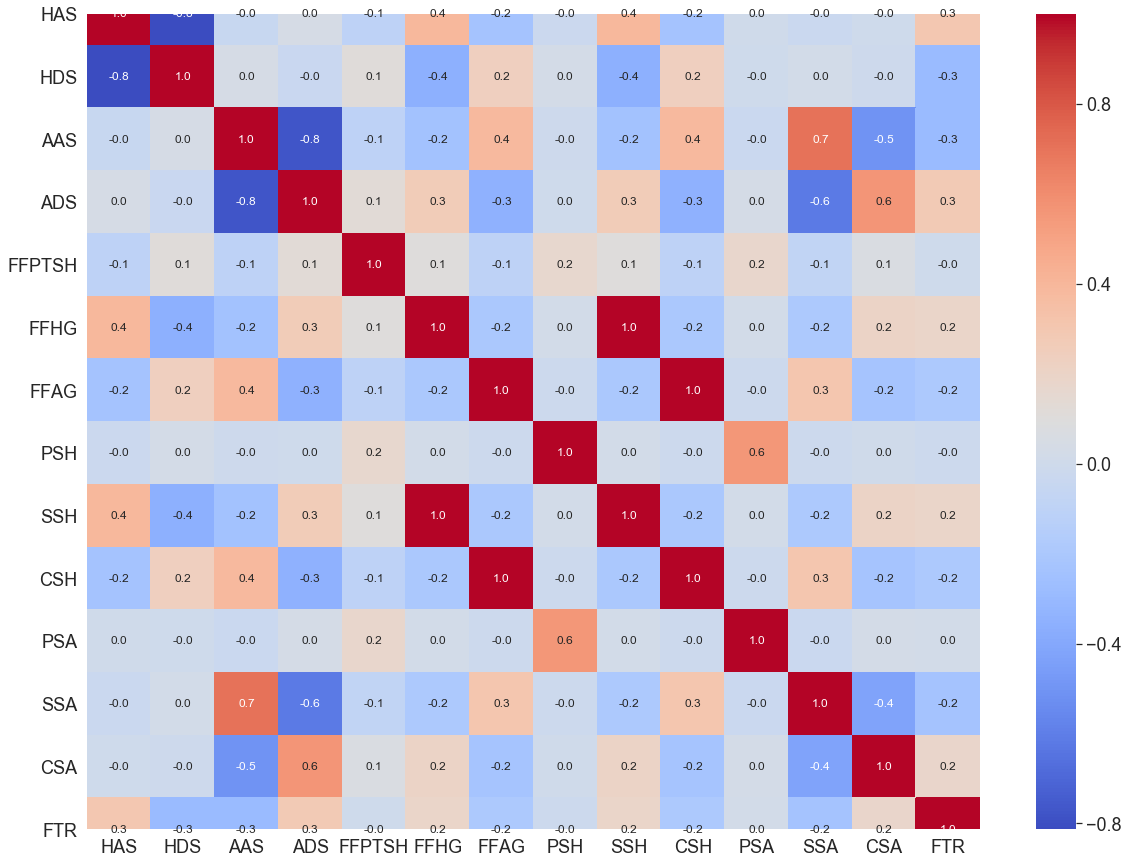

In [41]:
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(df_num_eng.corr(), annot = True, fmt='.1f', cmap= 'coolwarm', ax=ax);

### end MichaelMod_2

# Methodology Overview

# Model Training & Validation

### MichaelMod_3

## Functions

In [42]:
# the functions are mostly unmodified, except some returns. I commented there to notify
def get_scores(model,X,y):
    '''
    Parameters:
        model
        X
        y
    
    Returns:
    '''
    scores = cross_validate(model, X, y, scoring=('accuracy','f1_macro','precision_macro','recall_macro','roc_auc_ovr'),
                            cv=10, return_train_score=True,n_jobs=n_cpu)
    print('Accuracy: %f'%(scores['test_accuracy'].mean()))
    print('Precision: %f'%(scores['test_precision_macro'].mean()))
    print('Recall: %f'%(scores['test_recall_macro'].mean()))
    print('f1 Score: %f'%(scores['test_f1_macro'].mean()))
    print('ROC-AUC: %f'%(scores['test_roc_auc_ovr'].mean()))
    return scores

def get_best_params_RandomizedCV(model,X,y,param_grid,refit='accuracy'):
    '''
    This function executes the RandomizedSearchCV() to tune the 
    hyperparameters, prints the best scores and returns the list of 
    best performing hyperparameters.
    
    Parameters:
        model
        X
        y
        param_grid
        refit='accuracy'
    
    Returns:
        grid_results.best_params_ (dictionary):
    '''
    scoring=('accuracy','f1_macro','roc_auc_ovr')
    other_scores=[score for score in list(scoring) if score!=refit] 
    grid_results = RandomizedSearchCV(model, param_grid, 
                                       cv=10,n_jobs=n_cpu,
                                       scoring=scoring,
                                       refit=refit)
    
#         my debug purpose
#     #   =======================================
#         print(type(grid_results))
#         print(grid_results.__dict__)
#         print(grid_results.param_distributions)
#         print('\n')
#     #   =======================================

    grid_results.fit(X,y)
    cv_results=grid_results.cv_results_
    best_index_results = np.nonzero(cv_results['rank_test_%s'%(refit)] == 1)[0][0]
    print('Best mean %s Score: '%(refit),grid_results.best_score_)
    print('Best mean %s Score: '%(other_scores[0]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    print('Best mean %s Score: '%(other_scores[1]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    print('Best parameters: \n',grid_results.best_params_)
    return grid_results.best_params_, grid_results  #Mike: I added the grid_results in return for debug

def get_best_params_GridCV(model,X,y,param_grid,refit='accuracy'):
    '''
    This function executes the GridSearchCV() to tune the 
    hyperparameters, prints the best scores and returns the list of 
    best performing hyperparameters.
    
    Parameters:
    model
    X
    y
    param_grid
    refit='accuracy'
    
    Returns:
    grid_results.best_params_ (dictionary):
    '''
    scoring=('accuracy','f1_macro','roc_auc_ovr')
    other_scores=[score for score in list(scoring) if score!=refit] 
    grid_results = GridSearchCV(model, param_grid, 
                                       cv=10,n_jobs=n_cpu,
                                       scoring=scoring,
                                       refit=refit)
    
    grid_results.fit(X, y)
    print('Best parameters: \n',grid_results.best_params_)
    cv_results=grid_results.cv_results_
    best_index_results = np.nonzero(cv_results['rank_test_%s'%(refit)] == 1)[0][0]
    print('Best mean %s Score: '%(refit),grid_results.best_score_)
    print('Best mean %s Score: '%(other_scores[0]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    print('Best mean %s Score: '%(other_scores[1]),cv_results['mean_test_%s'%(other_scores[0])][best_index_results])
    return grid_results.best_params_, grid_results #Mike: I added the grid_results in return for debug


## feeding data to test the above functions ( This one may trains without one type of data for testing)

In [43]:
df_old = df # save a cur df ver to df_old.

In [62]:
df = df_old.copy()

type_removed = None # removes a result type here if needed for testing purpose
df = df[df.FTR != type_removed]

new_feats_lst = list(df.select_dtypes(include = ['float64']).columns)
wanted_feats = new_feats_lst + ['HomeTeam', 'AwayTeam'] 

X=df[[column for column in df.columns if column in wanted_feats]]
y=df['FTR']


# encode the remaining text feat.s
from sklearn.preprocessing import LabelEncoder,StandardScaler,scale,MinMaxScaler

enc = LabelEncoder()
for column in ['HomeTeam','AwayTeam']: # encoding list
    X[column]=enc.fit_transform(X[column])
    
X.head()

,HomeTeam,AwayTeam,HAS,HDS,AAS,ADS,FFPTSH,FFHG,FFAG,PSH,SSH,CSH,PSA,SSA,CSA
0,0,32,1.356923,0.711075,0.769196,1.358580,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657
1,5,27,0.880000,1.292399,0.674295,1.402534,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657
2,12,3,1.101538,0.919493,0.865345,1.820597,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657
3,15,13,0.724308,1.303637,0.667873,1.387121,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657
4,20,30,0.575385,0.966490,1.356763,1.144258,1.645014,1.533657,1.142521,1.645014,1.533657,1.142521,1.102355,1.142521,1.533657


# Testing models

In [63]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

from random import randint
from scipy.stats import uniform, truncnorm, randint
from sklearn.ensemble import RandomForestClassifier
import random

## (1)Param Grid and Model Setups

In [64]:
'''
Please consider adding more worth testing options or models for below
'''

# params_grid dictionary
pg_dict = {
    'rfc':{
        'n_estimators': range(4,200),
        'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
        'min_samples_split': uniform(0.01, 0.199)
    },

    'knc':{
        'n_neighbors': range(1,10),
        'weights': ['distance', 'uniform'],
        'algorithm': ['ball_tree', 'kd_tree','brute']
    },

    'gb':{
        'priors': [None],
        'var_smoothing': uniform(0.01, 0.199)
    },

    # Regression loss options not included for sgd:
    # ['squared_loss','hinge', 'squared_hinge', 'perceptron', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
    # To test them, consider CalibratedClassifierCV() instead
    'sgd':{
        'max_iter': [1000000], # not suggest to change it! 
        'tol': [1e-3],         # not suggest to change it! 
        'loss': ['log', 'modified_huber', 'log','modified_huber'] + \
        [] #For regression loss
    },

    'qda':{},

    'dt':{
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None],
        'max_features':['sqrt','log2','auto', None]
    },
    
    'lr':{
        'penalty' : ['l1', 'l2', 'elasticnet'],
        'C' : np.random.rand(100),
        'solver' : ['newton-cg', 'sag','saga', 'lbfgs'],
        'fit_intercept' : [True, False]
    },
    
    'mlp':{
        'activation':['identity', 'logistic', 'tanh', 'relu'],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'alpha' : uniform(1e-5, 1e-4),
        'batch_size' : ['auto'],
        'learning_rate':['constant', 'invscaling', 'adaptive'],
    }
    
    #please add SVC for testing
}



# models
models_dict = {
    'rfc':RandomForestClassifier(),
    'knc':KNeighborsClassifier(),
    'gb':GaussianNB(),
    'sgd': SGDClassifier(),
    'qda': QuadraticDiscriminantAnalysis(),
    'dt': DecisionTreeClassifier(),
    'lr': LogisticRegression(),
    'mlp': MLPClassifier()
    #please add SVC for testing
}

X.shape


(4180, 15)

## (2)Start Testing

In [65]:
# TODO: implement a ranking function for the tuned models
def batch_testing_models(models_dict, X, y, pg_dict, refit='accuracy'):
    rets = []
    for m in models_dict:
        print('Current Model: ', m)
        rets.append(get_best_params_RandomizedCV(models_dict[m], X, y, pg_dict[m], refit) + (str(m),))
        print('\n')
    ret_best_soc = max(rets, key = lambda e: e[1].best_score_) # max comp by the model's score
    model = ret_best_soc[1]
    
    #I only looked at accuracy for simplicity. Assume refit = 'accurary' for gbpR function
    print('Testing done.\nBest Accuracy: {}\nThe model is: {}'.format(model.best_score_, ret_best_soc[2]))
    
    return model #the tuned model

In [66]:
ret = batch_testing_models(models_dict, X, y, pg_dict, refit='accuracy')

Current Model:  rfc
Best mean accuracy Score:  0.5411483253588517
Best mean f1_macro Score:  0.39107054775432737
Best mean roc_auc_ovr Score:  0.39107054775432737
Best parameters: 
 {'max_features': 0.29685622010681495, 'min_samples_split': 0.2086447049310173, 'n_estimators': 61}


Current Model:  knc
Best mean accuracy Score:  0.4712918660287081
Best mean f1_macro Score:  0.42142713329574943
Best mean roc_auc_ovr Score:  0.42142713329574943
Best parameters: 
 {'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'kd_tree'}


Current Model:  gb
Best mean accuracy Score:  0.4791866028708133
Best mean f1_macro Score:  0.2740376486981601
Best mean roc_auc_ovr Score:  0.2740376486981601
Best parameters: 
 {'priors': None, 'var_smoothing': 0.03808300889283422}


Current Model:  sgd
Best mean accuracy Score:  0.4473684210526316
Best mean f1_macro Score:  0.32110345491657283
Best mean roc_auc_ovr Score:  0.32110345491657283
Best parameters: 
 {'tol': 0.001, 'max_iter': 1000000, 'loss': 'log'

## Previous testing models, use Tessting Models(1)(2) for more advanced results

In [67]:
from time import time
gen = (e for e in [
            LogisticRegression(n_jobs=n_cpu),
            KNeighborsClassifier(n_neighbors=5,n_jobs=n_cpu),
            SVC(kernel='poly', degree=2, probability=True),
            SVC(kernel='sigmoid', probability=True),
            SVC(kernel='rbf', probability=True),
            GaussianNB(),
            SGDClassifier(max_iter=1000000, tol=1e-3, loss = 'log' ), #not work by default loss='hinge', cause it is equavalen to SVM without probability=True
            MLPClassifier(solver='sgd',activation='identity',learning_rate='adaptive',
                          hidden_layer_sizes=(8, 2), random_state=76),
            RandomForestClassifier(n_estimators=100,n_jobs=n_cpu),
            SVC(kernel='poly', degree=4, probability=True)#not recommened for degree over 8 fot tsesting)
                ]
      ) 
def get_all_scores(eval_func, models_g, *args):
    model_lst = []
    for model in models_g:
        model_lst.append(model)
        
        print(type(model).__name__)
        t1 = time()
        eval_func(model, *args)
        t2 = time()
        print('Total Runtime: %.2f' %(t2-t1), '\n')
    return model_lst

lst = get_all_scores(get_scores, gen, X, y)


LogisticRegression
Accuracy: 0.539952
Precision: 0.355711
Recall: 0.454565
f1 Score: 0.395000
ROC-AUC: 0.674043
Total Runtime: 0.33 

KNeighborsClassifier
Accuracy: 0.450718
Precision: 0.411408
Recall: 0.418205
f1 Score: 0.411737
ROC-AUC: 0.599321
Total Runtime: 0.71 

SVC
Accuracy: 0.489713
Precision: 0.335769
Recall: 0.374135
f1 Score: 0.299010
ROC-AUC: 0.621836
Total Runtime: 5.28 

SVC
Accuracy: 0.352153
Precision: 0.291634
Recall: 0.332595
f1 Score: 0.300941
ROC-AUC: 0.497475
Total Runtime: 4.04 

SVC
Accuracy: 0.503110
Precision: 0.347191
Recall: 0.394145
f1 Score: 0.329813
ROC-AUC: 0.617633
Total Runtime: 6.05 

GaussianNB
Accuracy: 0.499043
Precision: 0.466349
Recall: 0.468180
f1 Score: 0.459451
ROC-AUC: 0.659225
Total Runtime: 0.07 

SGDClassifier
Accuracy: 0.453110
Precision: 0.436589
Recall: 0.419757
f1 Score: 0.367531
ROC-AUC: 0.618841
Total Runtime: 0.33 

MLPClassifier
Accuracy: 0.538995
Precision: 0.415054
Recall: 0.452620
f1 Score: 0.395105
ROC-AUC: 0.667997
Total Runti

### end MichaelMod_3

# Results

In [68]:
count = 0
for i in y:
    if i == 0:
        count += 1
        
count/len(y)

0.24808612440191388

# Final Predictions on Test Set

In [69]:
save = lst[2].fit(X,y).predict(X)

In [70]:
-1 in save


True

# Conclusion